## Imports

In [3]:
import time
from timeit import default_timer as timer
import numpy as np
from functools import wraps
import cProfile
import subprocess
NAME = "Phoebe"

# getAcc Profiling Comparisons

In [15]:
# getAcc() 
! python -m memory_profiler sph.py

Filename: sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   110  121.629 MiB -13944.918 MiB         301   @profile
   111                                         def getAcc( pos, vel, m, h, k, n, lmbda, nu ):
   112                                         	"""
   113                                         	Calculate the acceleration on each SPH particle
   114                                         	pos   is an N x 3 matrix of positions
   115                                         	vel   is an N x 3 matrix of velocities
   116                                         	m     is the particle mass
   117                                         	h     is the smoothing length
   118                                         	k     equation of state constant
   119                                         	n     polytropic index
   120                                         	lmbda external force constant
   121                                         	nu    viscosity


In [16]:
# Opt getAcc()
! python -m memory_profiler opt_sph.py

Filename: opt_sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   112  121.691 MiB -15238.809 MiB         301   @profile
   113                                         def getAcc( pos, vel, m, h, k, n, lmbda, nu ):
   114                                         	"""
   115                                         	Calculate the acceleration on each SPH particle
   116                                         	pos   is an N x 3 matrix of positions
   117                                         	vel   is an N x 3 matrix of velocities
   118                                         	m     is the particle mass
   119                                         	h     is the smoothing length
   120                                         	k     equation of state constant
   121                                         	n     polytropic index
   122                                         	lmbda external force constant
   123                                         	nu    viscos

## getAcc() Optimization Results


Version  |Initial (MiB)|peak (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   112.418   | 168.672 | 168.672 
Optimized|   122.039   | 172.168 | 170.191



# getDensity Profiling Comparisons

In [13]:
# get density
! python -m memory_profiler sph.py

Filename: sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    77  122.367 MiB -23257.410 MiB         901   @profile
    78                                         def getDensity( r, pos, m, h ):
    79                                         	"""
    80                                         	Get Density at sampling loctions from SPH particle distribution
    81                                         	r     is an M x 3 matrix of sampling locations
    82                                         	pos   is an N x 3 matrix of SPH particle positions
    83                                         	m     is the particle mass
    84                                         	h     is the smoothing length
    85                                         	rho   is M x 1 vector of densities
    86                                         	"""
    87                                         	
    88  122.367 MiB -1082.000 MiB         901   	M = r.shape[0]
    89                  

In [14]:
# opt get density
! python -m memory_profiler opt_sph.py

Filename: opt_sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    79  123.195 MiB -18965.469 MiB         901   @profile
    80                                         def getDensity( r, pos, m, h ):
    81                                         	"""
    82                                         	Get Density at sampling loctions from SPH particle distribution
    83                                         	r     is an M x 3 matrix of sampling locations
    84                                         	pos   is an N x 3 matrix of SPH particle positions
    85                                         	m     is the particle mass
    86                                         	h     is the smoothing length
    87                                         	rho   is M x 1 vector of densities
    88                                         	"""
    89                                         	
    90  123.195 MiB -4607.562 MiB         901   	M = r.shape[0]
    91              

## getDensity() Optimization Results


Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   122.367   | ? | 149.680 
Optimized|   123.195   | ? | 144.129



# pairwise Profiling Comparisons

In [9]:
# pairwise 
! python -m memory_profiler sph.py

Filename: sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    48  122.129 MiB -19271.453 MiB        1202   @profile	
    49                                         def getPairwiseSeparations( ri, rj ):
    50                                         	"""
    51                                         	Get pairwise desprations between 2 sets of coordinates
    52                                         	ri    is an M x 3 matrix of positions
    53                                         	rj    is an N x 3 matrix of positions
    54                                         	dx, dy, dz   are M x N matrices of separations
    55                                         	"""
    56                                         	
    57  122.129 MiB -1050.227 MiB        1202   	M = ri.shape[0]
    58  122.129 MiB -1050.227 MiB        1202   	N = rj.shape[0]
    59                                         	
    60                                         	# positions ri = (x,y,z)
 

In [12]:
# pairwise Optimized
! python -m memory_profiler opt_sph.py

Filename: opt_sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    67  123.383 MiB -25377.207 MiB        1202   @profile	
    68                                         def getPairwiseSeparations(ri, rj):
    69                                             """
    70                                             Get pairwise separations between 2 sets of coordinates using numpy.subtract.outer()
    71                                             to avoid unnecessary memory allocations.
    72                                             """
    73  130.887 MiB -1158.930 MiB        1202       dx = np.subtract.outer(ri[:, 0], rj[:, 0])
    74  131.059 MiB -5309.828 MiB        1202       dy = np.subtract.outer(ri[:, 1], rj[:, 1])
    75  138.691 MiB 1579.148 MiB        1202       dz = np.subtract.outer(ri[:, 2], rj[:, 2])
    76                                         
    77  138.691 MiB -7595.492 MiB        1202       return dx, dy, dz




## getPairwise Optimization Results

Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   118.590   | 121.098 | 121.098 
Optimized|   119.555   | 216.289 | 125.668



# gradW Profiling Comparisons

In [9]:
# gradW Original
! python -m memory_profiler sph.py

Filename: sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    28  119.438 MiB -2070.977 MiB         301   @profile	
    29                                         def gradW( x, y, z, h ):
    30                                         	"""
    31                                         	Gradient of the Gausssian Smoothing kernel (3D)
    32                                         	x     is a vector/matrix of x positions
    33                                         	y     is a vector/matrix of y positions
    34                                         	z     is a vector/matrix of z positions
    35                                         	h     is the smoothing length
    36                                         	wx, wy, wz     is the evaluated gradient
    37                                         	"""
    38                                         	
    39  123.105 MiB  747.633 MiB         301   	r = np.sqrt(x**2 + y**2 + z**2)
    40                        

In [13]:
# gradW Optimized
! python -m memory_profiler opt_sph.py

Filename: opt_sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    28  119.555 MiB -1988.168 MiB         301   @profile	
    29                                         def gradW( x, y, z, h ):
    30                                         	"""
    31                                         	Gradient of the Gausssian Smoothing kernel (3D)
    32                                         	x     is a vector/matrix of x positions
    33                                         	y     is a vector/matrix of y positions
    34                                         	z     is a vector/matrix of z positions
    35                                         	h     is the smoothing length
    36                                         	wx, wy, wz     is the evaluated gradient
    37                                         	"""
    38                                         	# initalize the arrays
    39  119.555 MiB -273.734 MiB         301   	r = np.empty(x.shape, dtype=x.dtype)

## gradW Optimization Results


Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   119.438   | 870.738 | 125.551 
Optimized|   119.555   | 216.289 | 125.668

By optimizing the gradW function with np.empty to initailze arrays and using in-place operations we were able to significantly reduce the maximum memory usage during this function which increases the more efficient use of memory allocation. 

# W Profiling Comparisons

In [3]:
# W
! python -m memory_profiler sph.py

Filename: sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    11  137.219 MiB -25110.090 MiB         901   @profile
    12                                         def W( x, y, z, h ):
    13                                         	"""
    14                                             Gausssian Smoothing kernel (3D)
    15                                         	x     is a vector/matrix of x positions
    16                                         	y     is a vector/matrix of y positions
    17                                         	z     is a vector/matrix of z positions
    18                                         	h     is the smoothing length
    19                                         	w     is the evaluated smoothing function
    20                                         	"""
    21                                         	
    22  152.484 MiB 4762.035 MiB         901   	r = np.sqrt(x**2 + y**2 + z**2)
    23                                        

In [4]:
# W optimized
! python -m memory_profiler opt_sph.py

Filename: opt_sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    11  137.535 MiB -20373.844 MiB         901   @profile
    12                                         def W( x, y, z, h ):
    13                                         	# OPTIMIZED VERSION
    14                                         	"""
    15                                             Gausssian Smoothing kernel (3D)
    16                                         	x     is a vector/matrix of x positions
    17                                         	y     is a vector/matrix of y positions
    18                                         	z     is a vector/matrix of z positions
    19                                         	h     is the smoothing length
    20                                         	w     is the evaluated smoothing function
    21                                         	"""
    22  145.168 MiB -1958.254 MiB         901   	r = np.square(x)
    23  152.801 MiB -4021.664 MiB    

## W Optimization Results


Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   137.219   | 160.117 | 160.117 
Optimized|   137.535   | 152.801 | 152.801

By optimizing the W function with inplace operations, we were able to decrease the maximul MiB of memory used by 8 MiB. 

# main Profiling Comparisons

In [17]:
# main
! python -m memory_profiler sph.py

Filename: sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   154  112.605 MiB  112.605 MiB           1   @profile
   155                                         def main():
   156                                         	""" SPH simulation """
   157                                         	
   158                                         	# Simulation parameters
   159  112.605 MiB    0.000 MiB           1   	N         = 1000    # Number of particles
   160  112.605 MiB    0.000 MiB           1   	t         = 0      # current time of the simulation
   161  112.605 MiB    0.000 MiB           1   	tEnd      = 12     # time at which simulation ends
   162  112.605 MiB    0.000 MiB           1   	dt        = 0.04   # timestep
   163  112.605 MiB    0.000 MiB           1   	M         = 2      # star mass
   164  112.605 MiB    0.000 MiB           1   	R         = 0.75   # star radius
   165  112.605 MiB    0.000 MiB           1   	h         = 0.1    # smoothing length


In [18]:
# opt
! python -m memory_profiler opt_sph.py

Filename: opt_sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   156  112.930 MiB  112.930 MiB           1   @profile
   157                                         def main():
   158                                         	""" SPH simulation """
   159                                         	
   160                                         	# Simulation parameters
   161  112.930 MiB    0.000 MiB           1   	N         = 1000    # Number of particles
   162  112.930 MiB    0.000 MiB           1   	t         = 0      # current time of the simulation
   163  112.934 MiB    0.004 MiB           1   	tEnd      = 12     # time at which simulation ends
   164  112.934 MiB    0.000 MiB           1   	dt        = 0.04   # timestep
   165  112.934 MiB    0.000 MiB           1   	M         = 2      # star mass
   166  112.934 MiB    0.000 MiB           1   	R         = 0.75   # star radius
   167  112.934 MiB    0.000 MiB           1   	h         = 0.1    # smoothing len

## getDensity() Optimization Results

Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   122.367   | 149.680 | 149.680 
Optimized|   123.195   | 144.129 | 144.129

## getPairwise Optimization Results

Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   122.129   | 137.395 | 137.395 
Optimized|   123.383   | 138.691 | 138.691

## gradW Optimization Results

Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   119.438   | 870.738 | 125.551 
Optimized|   119.555   | 216.289 | 125.668

## W Optimization Results

Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   137.219   | 160.117 | 160.117 
Optimized|   137.535   | 152.801 | 152.801

## Main Optimization Results

Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   112.605   | 123.527 | 123.527  
Optimized|   137.535   | 122.594 | 117.309



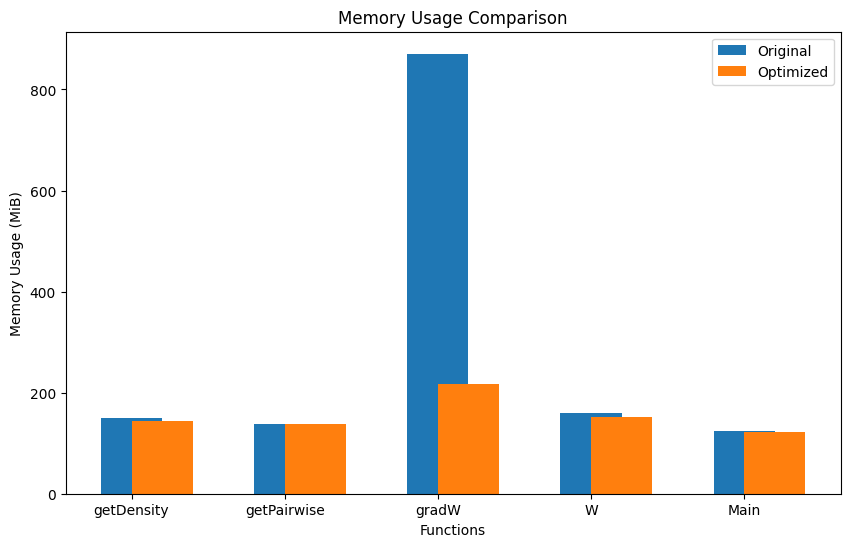

In [21]:
import matplotlib.pyplot as plt

# Example data (replace with actual parsed data)
functions = ['getDensity', 'getPairwise', 'gradW', 'W', 'Main']
original_max = [149.680, 137.395, 870.738, 160.117, 123.527]
optimized_max = [144.129, 138.691, 216.289, 152.801, 122.594]

x = range(len(functions))

plt.figure(figsize=(10, 6))
plt.bar(x, original_max, width=0.4, label='Original', align='center')
plt.bar(x, optimized_max, width=0.4, label='Optimized', align='edge')
plt.xlabel('Functions')
plt.ylabel('Memory Usage (MiB)')
plt.title('Memory Usage Comparison')
plt.xticks(x, functions)
plt.legend()
plt.show()

# Mprof 

In [24]:
! python -m mprof run opt_sph.py

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...


In [25]:
! python -m mprof run sph.py

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...


In [ ]:
! python -m mprof plot 

Input file not found: mem_opt/mprofile_20250223123640.dat
No files found from given input.


In [ ]:
! python -m mprof plot 

# mprof notes
Original has a max usage of 10Mib in the first 0 seconds, and then stays steady. Then the 